<a href="https://colab.research.google.com/github/DenisseUrenda/MachineLearning/blob/main/L04_RidgeLasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
En regresió lineal multivariada, se asume que la variable de respuesta depende linealmente de un conjunto de variables independientes. Es decir
$$
Y = \beta_0+\beta_1X_1+\dots+\beta_pX_p + \epsilon
$$
donde $\epsilon\sim N(0,\sigma^2)$

Regresión Ridge y Lasso usan este mismo modelo pero penalizan los valores $\beta_i$ en el momento de la minimización de la función de costo (MSE) con las funciones de penalización $\mathcal L_1$ y $\mathcal L_2$
$$
\mathcal L_1 = \sum_{i=1}^p|\beta_i|, \quad \mathcal L_2 = \sum_{i=1}^p\beta_i^2.
$$

Los $\beta_i$ para regresión LASSO son estimados minimizando la función
$$
\sum_{i=1}^n\left(y_i-\sum_{j=0}^p\beta_jx_{ji}\right)^2 + \lambda \sum_{i=1}^p|\beta_i|, \quad \lambda > 0
$$
con $x_{j0} = 1$ para todo $j=1,\dots,n$.

Los $\beta_i$ para regresión Ridge son estimados minimizando la función
$$
\sum_{i=1}^n\left(y_i-\sum_{j=0}^p\beta_jx_{ji}\right)^2 + \lambda \sum_{i=1}^p\beta_i^2, \quad \lambda > 0
$$
con $x_{j0} = 1$ para todo $j=1,\dots,n$.

En ambos modelos, $\lambda$ es un hiperparámetro que determina el nivel de penalización que se le impondrá a los coeficientes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(404, 13)

## Regresión Ridge

In [ ]:
clf = Ridge() #alpha=21
clf.fit(x_train, y_train)

Ridge()

In [ ]:
y_pred = clf.predict(x_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

MAE:  3.4024054045746843
MSE:  22.548158689769743


In [ ]:
clf.score(x_test, y_test) # R^2

0.7291312320284361

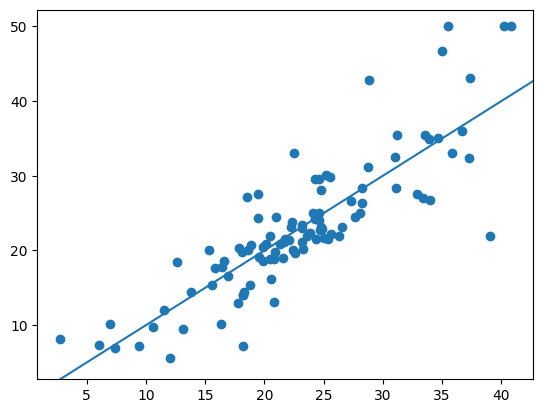

In [ ]:
plt.scatter(y_pred, y_test)
plt.axline((5,5), (40,40))
plt.show()

## Regresión LASSO

In [ ]:
clf = Lasso()
clf.fit(x_train, y_train)

Lasso()

In [ ]:
y_pred = clf.predict(x_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

MAE:  3.4053070968148766
MSE:  25.821651189939953


In [ ]:
clf.score(x_test, y_test) # R^2

0.6898070950696362

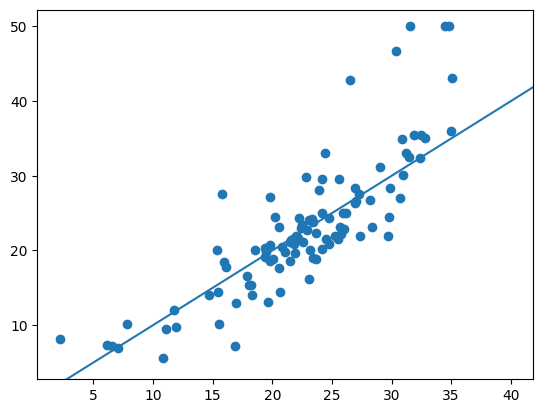

In [ ]:
plt.scatter(y_pred, y_test)
plt.axline((5,5), (40,40))
plt.show()